In [4]:
import pandas as pd

# Load the Excel file
file_path = r'C:\Users\Devaire User\Desktop\Access python\Dots Potential Customer Survey Data.xlsx'
df = pd.read_excel(file_path)
df.head()


,Unique ID,Country,Age,Annual Family Income ($),Gender,Time spent watching videos/TV,Time spent playing indoor sports,Time spent playing outdoor sports,Total Time spent working in front of screen,Sleeping hours,...,Has OTT subscription,Number of friends,Likes spicy food,Likes desserts,Wants to change career,Has debt,Has kids,Drinks alcohol,Smoker,Wear Specs
0,7319483,CAN,13,20423,Male,3,4,3,7,8,...,1,4,0,1,0,0,0,0,0,1
1,4791965,CAN,13,5570,Female,3,3,1,10,3,...,1,6,0,1,0,0,0,0,1,1
2,2991718,CAN,13,58706,Female,2,2,1,4,9,...,0,5,0,0,0,0,0,0,0,0
3,4220106,CAN,13,57118,Male,6,2,4,10,11,...,1,9,0,1,0,0,0,0,0,0
4,2263008,CAN,14,59834,Male,6,3,4,13,12,...,1,6,1,0,0,0,0,0,0,0


In [12]:
import pandas as pd

# Correcting file path with raw string literal
file_path = r'C:\Users\Devaire User\Desktop\Access python\Dots Potential Customer Survey Data.xlsx'  
df = pd.read_excel(file_path)

# Print out the column names to check for exact matches
print(df.columns)


Index(['Unique ID', 'Country', 'Age', 'Annual Family Income ($)', 'Gender',
       'Time spent watching videos/TV', 'Time spent playing indoor sports',
       'Time spent playing outdoor sports',
       'Total Time spent working in front of screen', 'Sleeping hours', 'IQ',
       'Whether parents have specs', 'English speaker',
       'Migrated within country', 'Migrated overseas',
       'Maritial Status (0 - Single, 1 - Married, 2 - Divorced)',
       'Has Diabetes', 'Education Status', 'Has Gym Subscription',
       'Has OTT subscription', 'Number of friends', 'Likes spicy food',
       'Likes desserts', 'Wants to change career', 'Has debt', 'Has kids',
       'Drinks alcohol', 'Smoker', 'Wear Specs'],
      dtype='object')


Index(['Unique ID', 'Country', 'Age', 'Annual Family Income ($)', 'Gender',
       'Time spent watching videos/TV', 'Time spent playing indoor sports',
       'Time spent playing outdoor sports',
       'Total Time spent working in front of screen', 'Sleeping hours', 'IQ',
       'Whether parents have specs', 'English speaker',
       'Migrated within country', 'Migrated overseas',
       'Maritial Status (0 - Single, 1 - Married, 2 - Divorced)',
       'Has Diabetes', 'Education Status', 'Has Gym Subscription',
       'Has OTT subscription', 'Number of friends', 'Likes spicy food',
       'Likes desserts', 'Wants to change career', 'Has debt', 'Has kids',
       'Drinks alcohol', 'Smoker', 'Wear Specs'],
      dtype='object')
   Unique ID Country  Age  Annual Family Income ($)  Gender  \
0    7319483     CAN   13                     20423    Male   
1    4791965     CAN   13                      5570  Female   
2    2991718     CAN   13                     58706  Female   
3    422010

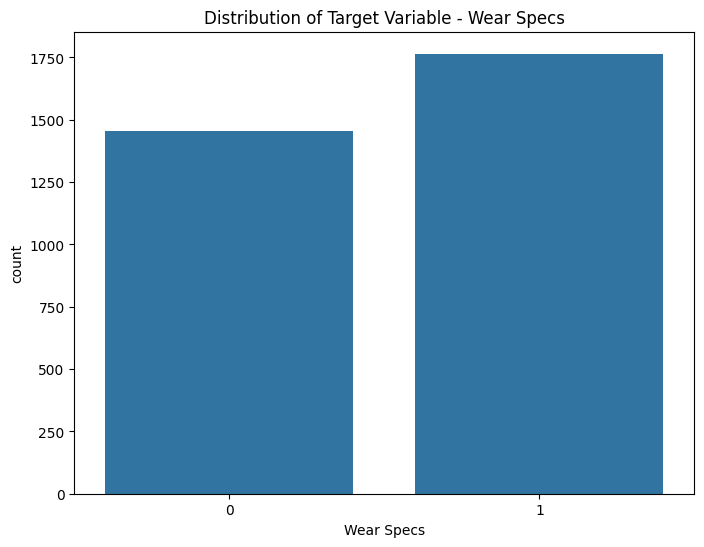

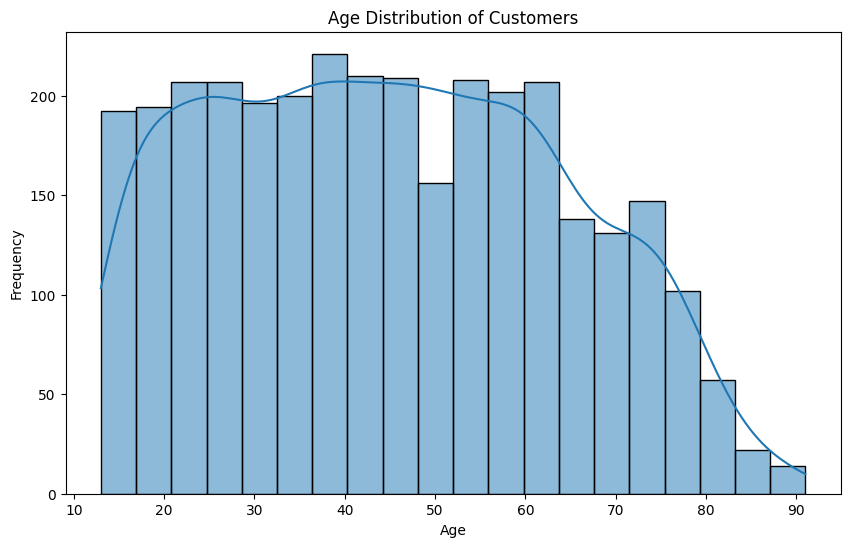

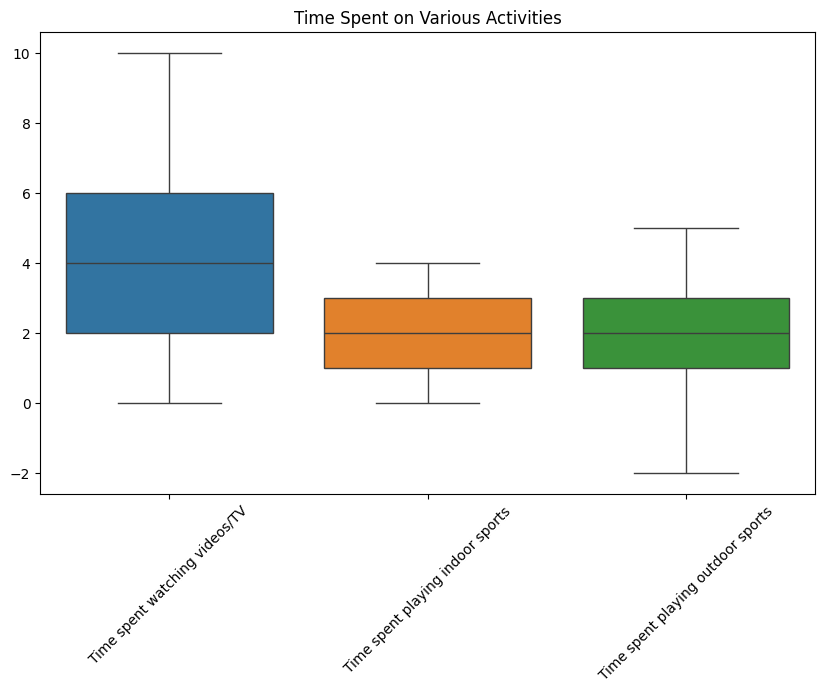

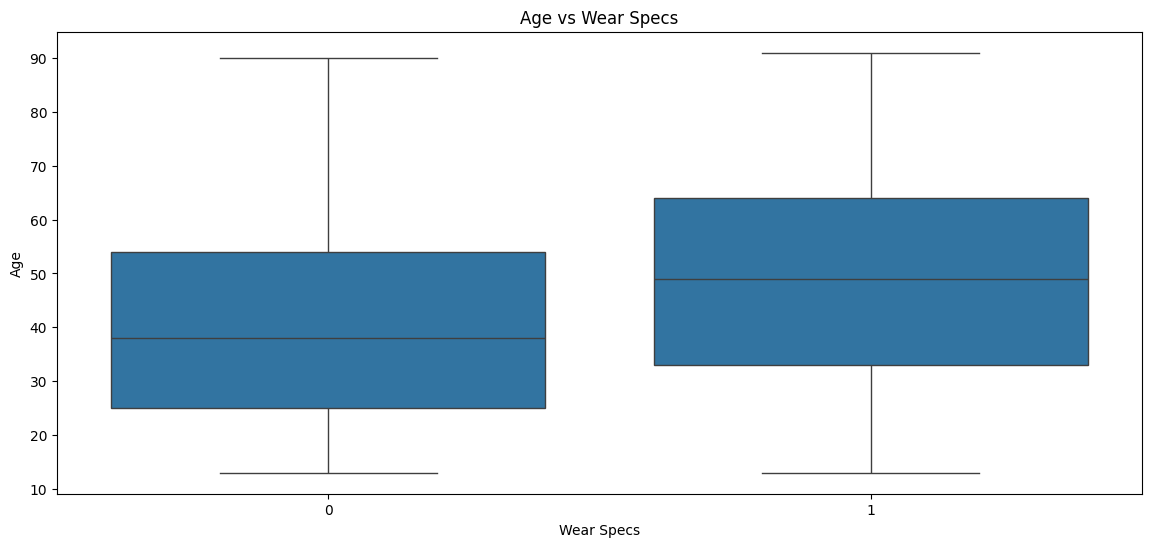

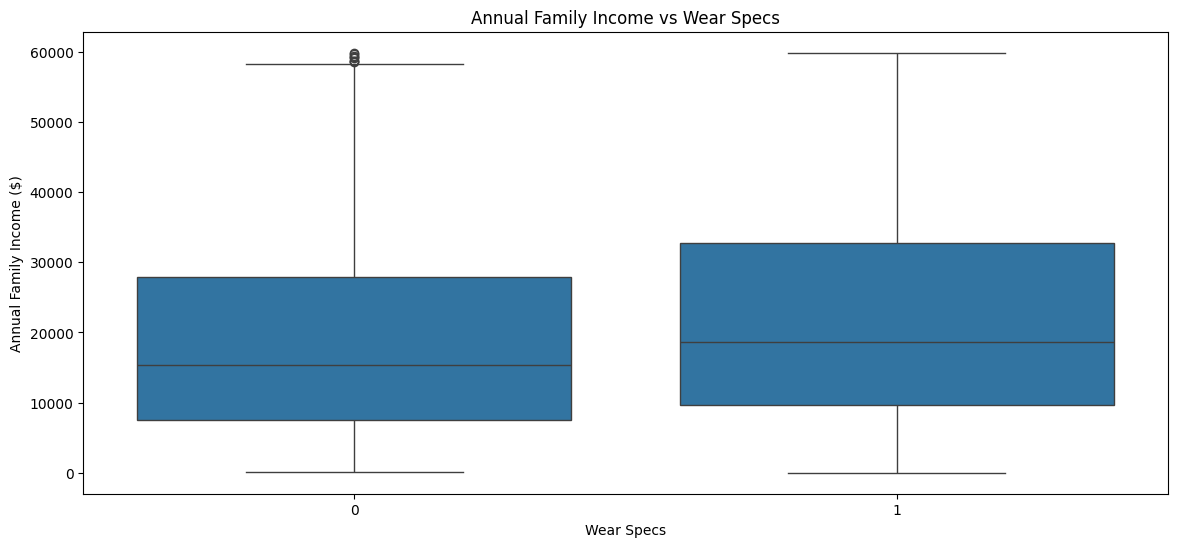

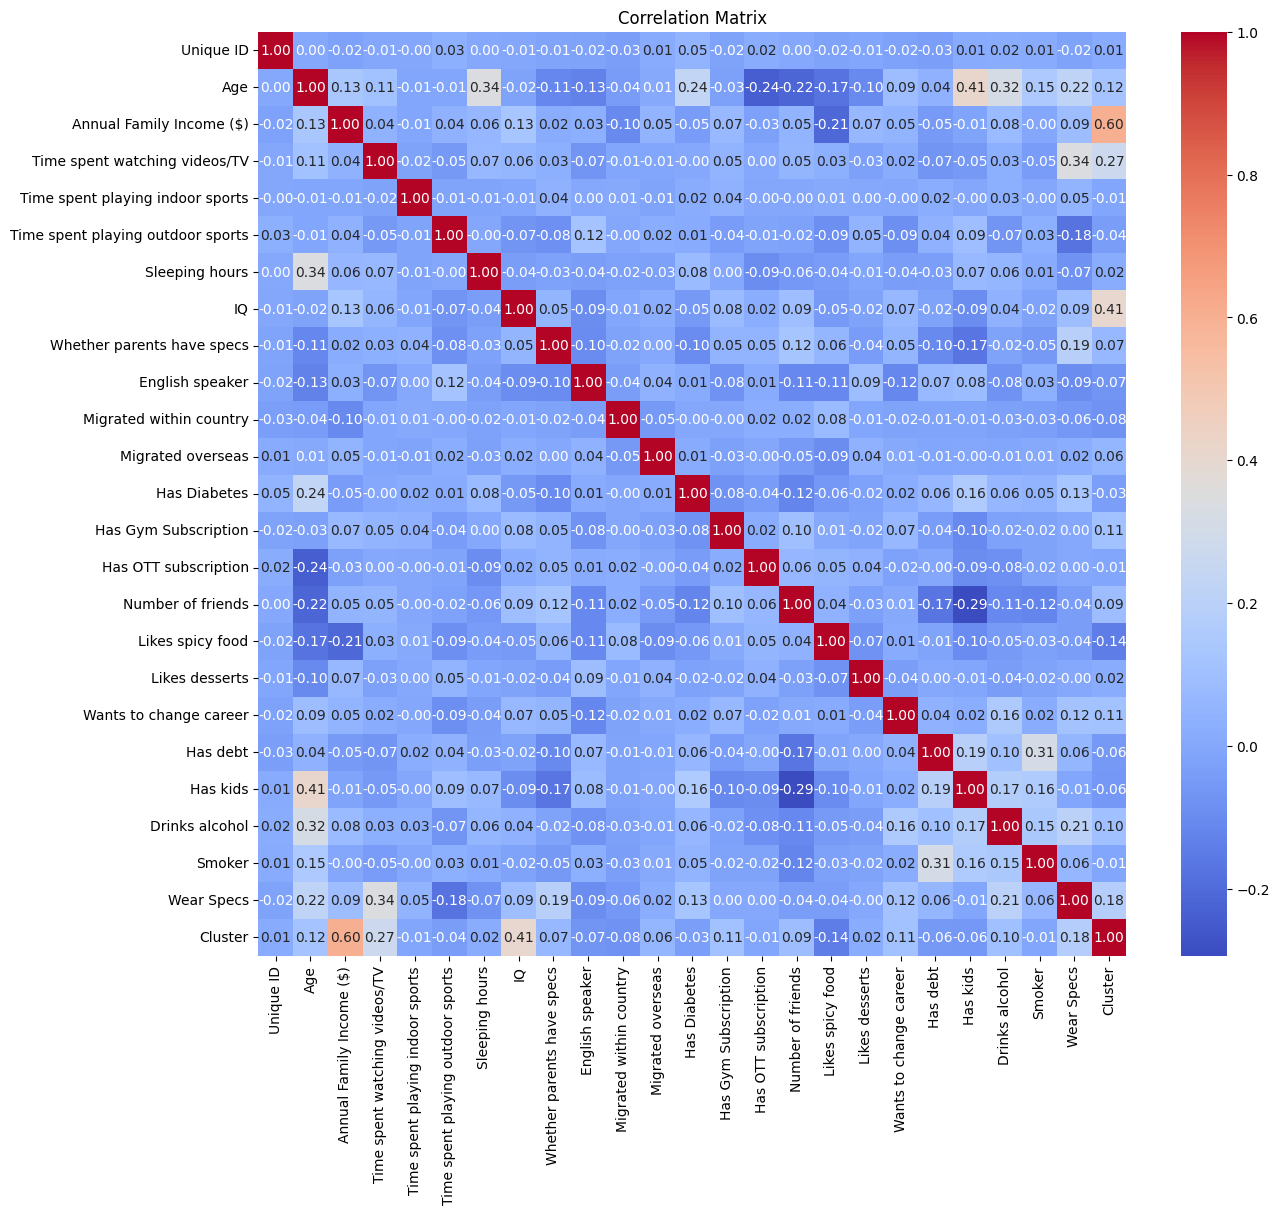

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Correcting file path with raw string literal
file_path = r'C:\Users\Devaire User\Desktop\Access python\Dots Potential Customer Survey Data.xlsx'  # Replace with the actual path
df = pd.read_excel(file_path)

# Print out the column names to check for exact matches
print(df.columns)

# Use the exact column names from your DataFrame
columns_to_keep = [
    'Unique ID', 'Country', 'Age', 'Annual Family Income ($)', 'Gender',
    'Time spent watching videos/TV', 'Time spent playing indoor sports',
    'Time spent playing outdoor sports', 'Total Time spent working in front of a screen',  # Adjust this if needed
    'Sleeping hours', 'IQ', 'Whether parents have specs', 'English speaker',
    'Migrated within country', 'Migrated overseas', 'Marital Status',
    'Has Diabetes', 'Education Status', 'Has Gym Subscription', 'Has OTT subscription',
    'Number of friends', 'Likes spicy food', 'Likes desserts', 'Wants to change career',
    'Has debt', 'Has kids', 'Drinks alcohol', 'Smoker', 'Wear Specs'
]

# Filter columns to keep only those that exist in the DataFrame
columns_to_keep = [col for col in columns_to_keep if col in df.columns]

# Drop any irrelevant columns if necessary
df = df[columns_to_keep]

# Display the cleaned dataframe
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Handle missing values (example: filling with median or dropping rows)
df = df.dropna()  # Or use df.fillna(df.median(), inplace=True)

# List of numeric columns to convert
numeric_columns = ['Age', 'Annual Family Income ($)', 'Time spent watching videos/TV', 
                   'Total Time spent working in front of a screen', 'Sleeping hours', 'IQ']

# Convert columns to numeric, forcing non-numeric values to NaN if the column exists
for column in numeric_columns:
    if column in df.columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')

# Handle NaN values (e.g., drop rows with NaN values or fill them)
df = df.dropna(subset=[col for col in numeric_columns if col in df.columns])

# Display the cleaned dataframe to ensure all selected columns are numeric
print(df.head())

# Descriptive statistics
print(df.describe())

# Visualizing the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Wear Specs')
plt.title('Distribution of Target Variable - Wear Specs')
plt.show()

# Age distribution of customers
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Time spent on various activities
activity_columns = [col for col in ['Time spent watching videos/TV', 'Time spent playing indoor sports', 
                     'Time spent playing outdoor sports', 'Total Time spent working in front of a screen'] if col in df.columns]

if activity_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df[activity_columns])
    plt.title('Time Spent on Various Activities')
    plt.xticks(rotation=45)
    plt.show()

# Comparison of wearing specs with other variables
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Wear Specs', y='Age')
plt.title('Age vs Wear Specs')
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Wear Specs', y='Annual Family Income ($)')
plt.title('Annual Family Income vs Wear Specs')
plt.show()

# Select relevant features for clustering
features = ['Age', 'Annual Family Income ($)', 'Time spent watching videos/TV', 
            'Total Time spent working in front of a screen', 'Sleeping hours', 'IQ']

# Ensure the columns exist in the DataFrame
features = [feature for feature in features if feature in df.columns]

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Drop non-numeric columns before computing correlation matrix
numeric_df = df.select_dtypes(include=['number'])

# Correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


